In [ ]:
import numpy as np # linear algebra
import pandas as pd # data preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
df = pd.read_csv('stock1.csv')

In [ ]:
df.head()

,Price,Date,Adj Close,Close,High,Low,Open,Volume
0,Ticker,NaN,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS,POWERGRID.NS
1,0,2007-10-05 00:00:00+00:00,32.92603683,56.58751297,61.59376525878906,46.77188491821289,50.51251220703125,855215656
2,1,2007-10-08 00:00:00+00:00,31.240449905395508,53.69063949584961,58.50001525878906,53.35313797,58.50001525878906,126671715
3,2,2007-10-09 00:00:00+00:00,33.367889404296875,57.34688949584961,57.85313797,50.82188797,53.71876144,116725709
4,3,2007-10-10 00:00:00+00:00,33.678829193115234,57.881263732910156,59.06251525878906,57.37501525878906,58.83751297,67931378


In [ ]:
df = df.drop(0)

In [ ]:
df.head()

,Price,Date,Adj Close,Close,High,Low,Open,Volume
1,0,2007-10-05 00:00:00+00:00,32.92603683,56.58751297,61.59376525878906,46.77188491821289,50.51251220703125,855215656
2,1,2007-10-08 00:00:00+00:00,31.240449905395508,53.69063949584961,58.50001525878906,53.35313797,58.50001525878906,126671715
3,2,2007-10-09 00:00:00+00:00,33.367889404296875,57.34688949584961,57.85313797,50.82188797,53.71876144,116725709
4,3,2007-10-10 00:00:00+00:00,33.678829193115234,57.881263732910156,59.06251525878906,57.37501525878906,58.83751297,67931378
5,4,2007-10-11 00:00:00+00:00,37.44273376464844,64.35001373291016,67.50001525878906,57.37501525878906,67.50001525878906,106320954


In [ ]:
# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date
df.set_index('Date', inplace=True)

In [ ]:
df.head()

,Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2007-10-05,0,32.92603683,56.58751297,61.59376525878906,46.77188491821289,50.51251220703125,855215656
2007-10-08,1,31.240449905395508,53.69063949584961,58.50001525878906,53.35313797,58.50001525878906,126671715
2007-10-09,2,33.367889404296875,57.34688949584961,57.85313797,50.82188797,53.71876144,116725709
2007-10-10,3,33.678829193115234,57.881263732910156,59.06251525878906,57.37501525878906,58.83751297,67931378
2007-10-11,4,37.44273376464844,64.35001373291016,67.50001525878906,57.37501525878906,67.50001525878906,106320954


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4208 entries, 2007-10-05 to 2024-10-31
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      4208 non-null   object
 1   Adj Close  4208 non-null   object
 2   Close      4208 non-null   object
 3   High       4208 non-null   object
 4   Low        4208 non-null   object
 5   Open       4208 non-null   object
 6   Volume     4208 non-null   object
dtypes: object(7)
memory usage: 263.0+ KB


In [ ]:
df.describe()

,Price,Adj Close,Close,High,Low,Open,Volume
count,4208,4208,4208,4208,4208,4208,4208
unique,4208,3661,2437,2372,2387,2238,4202
top,4191,35.89200973510742,55.68751144,56.193763732910156,56.25001525878906,58.50001525878906,0
freq,1,7,17,15,16,19,5


In [ ]:
 df.isna().sum()

,0
Price,0
Adj Close,0
Close,0
High,0
Low,0
Open,0
Volume,0


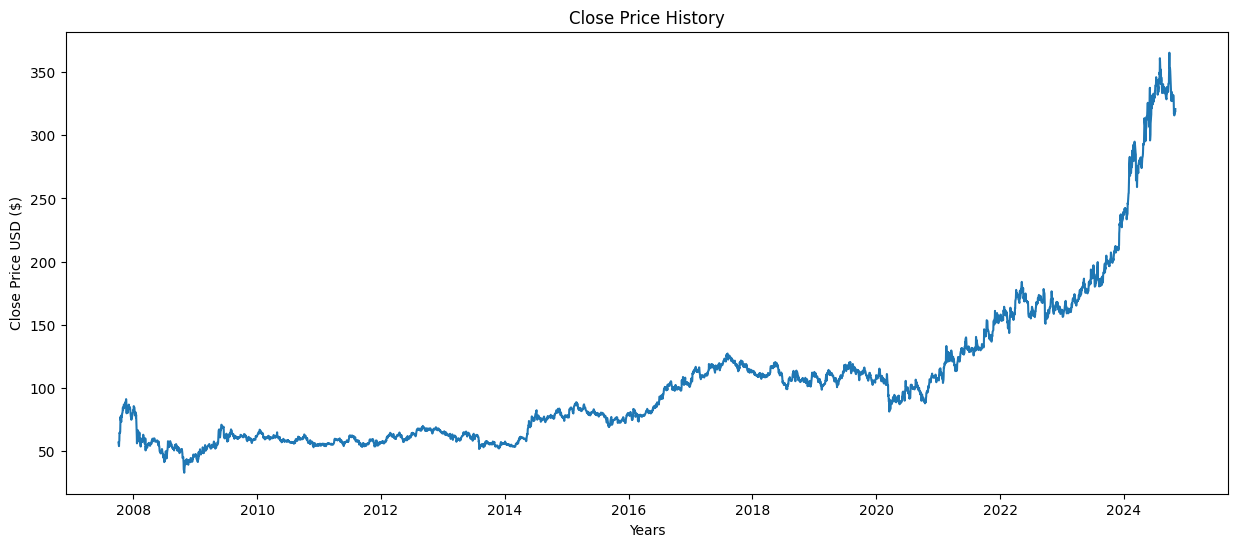

In [ ]:
plt.figure(figsize = (15,6))
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['Close'].plot()
plt.title('Close Price History')
plt.xlabel('Years')
plt.ylabel('Close Price USD ($)')
plt.show()

In [ ]:
def plot_graph(figsize,values,column_name):
  values.plot(figsize = figsize)
  plt.title(f"{column_name} of the Stock data")
  plt.xlabel('Years')
  plt.ylabel(column_name)
  plt.show()

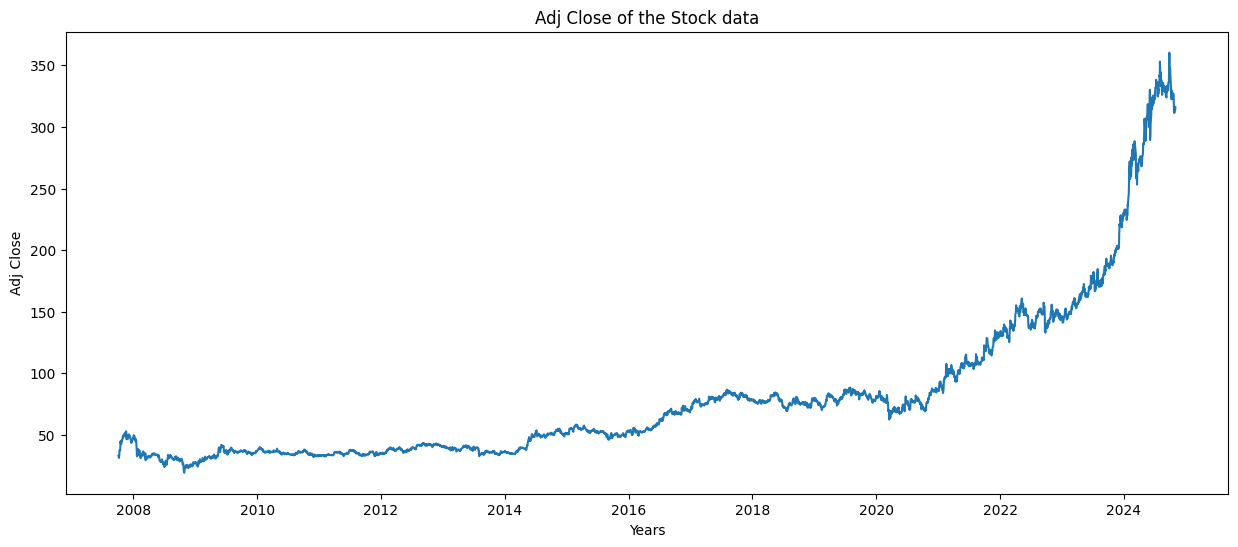

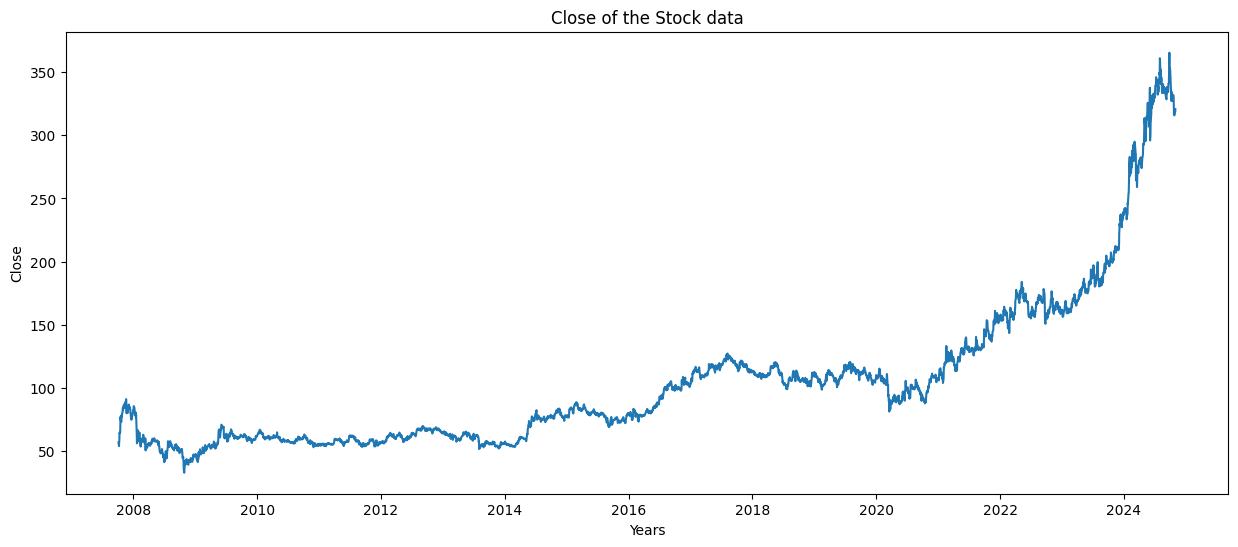

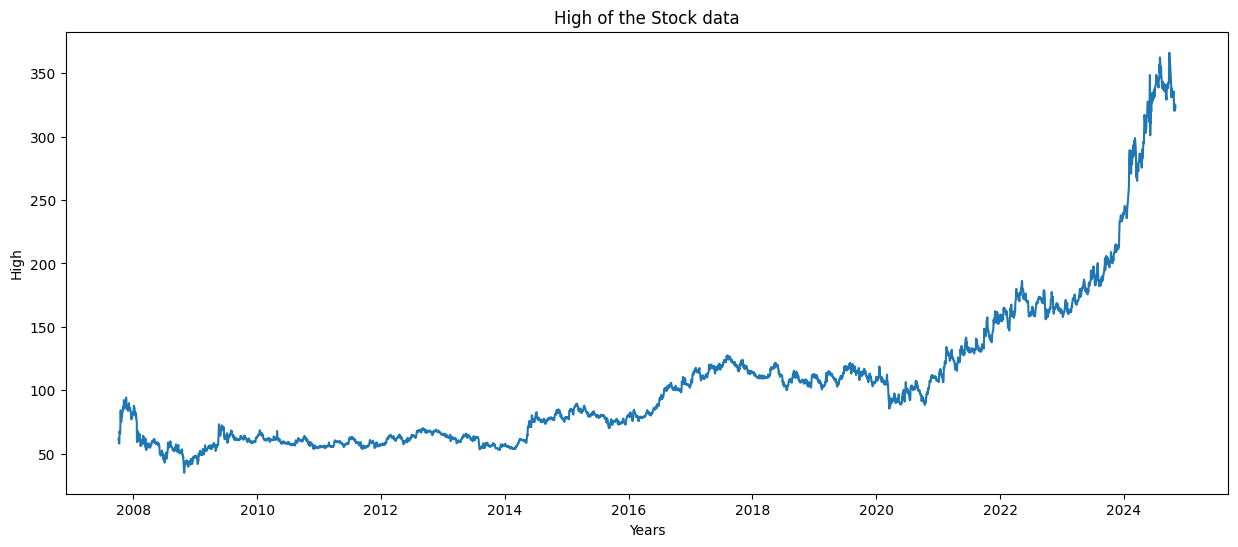

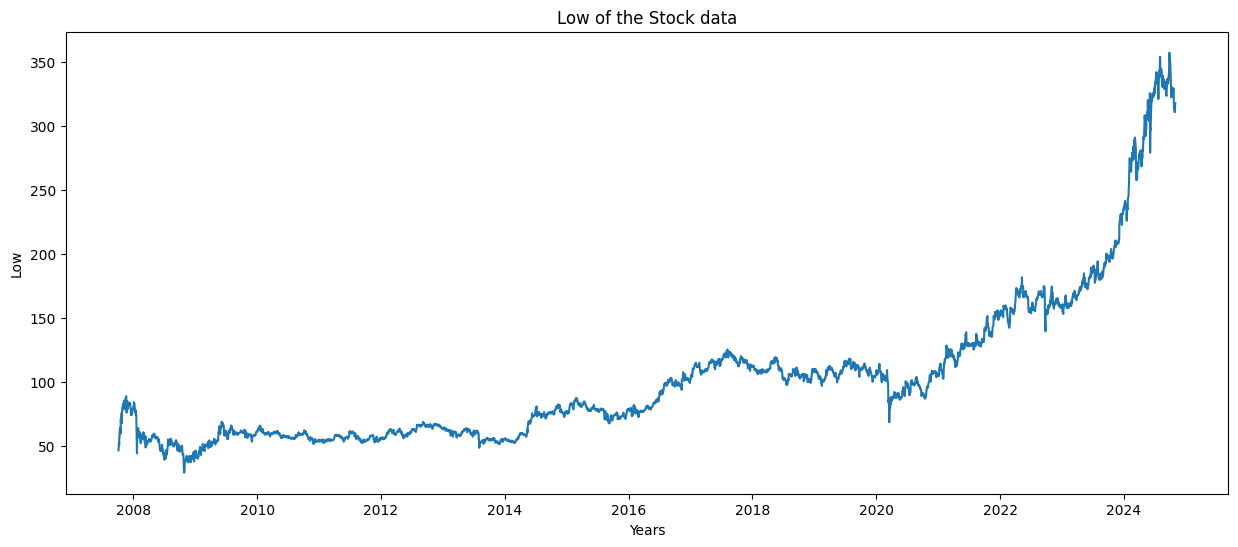

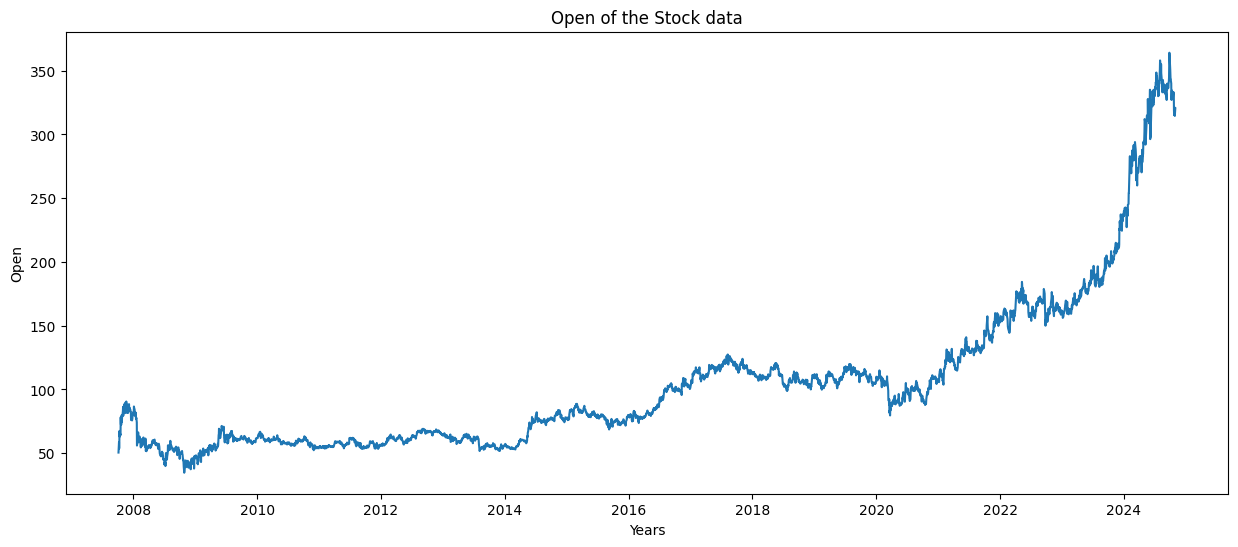

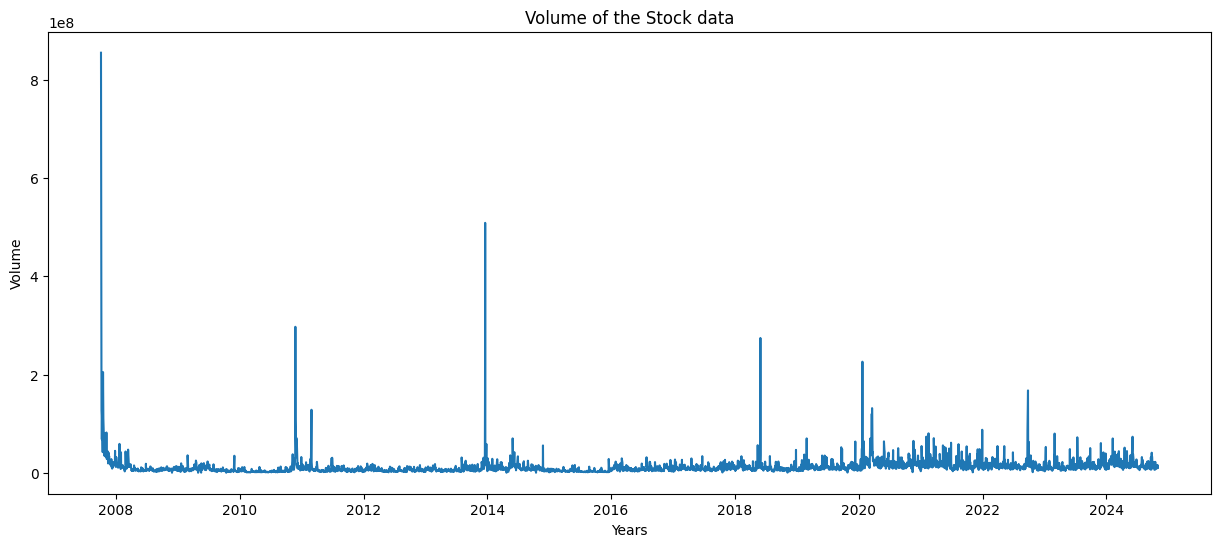

In [ ]:
# Convert relevant columns to numeric
cols_to_convert = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Plot the numeric columns
for col in cols_to_convert:
  plot_graph((15,6),df[col],col)

In [ ]:
for i in range(2007, 2025):
  # Access the year attribute for each date object in the index
  print(i, [d.year for d in df.index].count(i))#Number of days in each year

2007 59
2008 246
2009 243
2010 250
2011 246
2012 245
2013 248
2014 244
2015 246
2016 246
2017 248
2018 246
2019 243
2020 251
2021 248
2022 248
2023 245
2024 206


In [ ]:
df["Moving Average for 245 days"] = df["Close"].rolling(245).mean()

In [ ]:
df["Moving Average for 245 days"]

,Moving Average for 245 days
Date,
2007-10-05,NaN
2007-10-08,NaN
2007-10-09,NaN
2007-10-10,NaN
2007-10-11,NaN
...,...
2024-10-25,291.102856
2024-10-28,291.581836
2024-10-29,292.070407


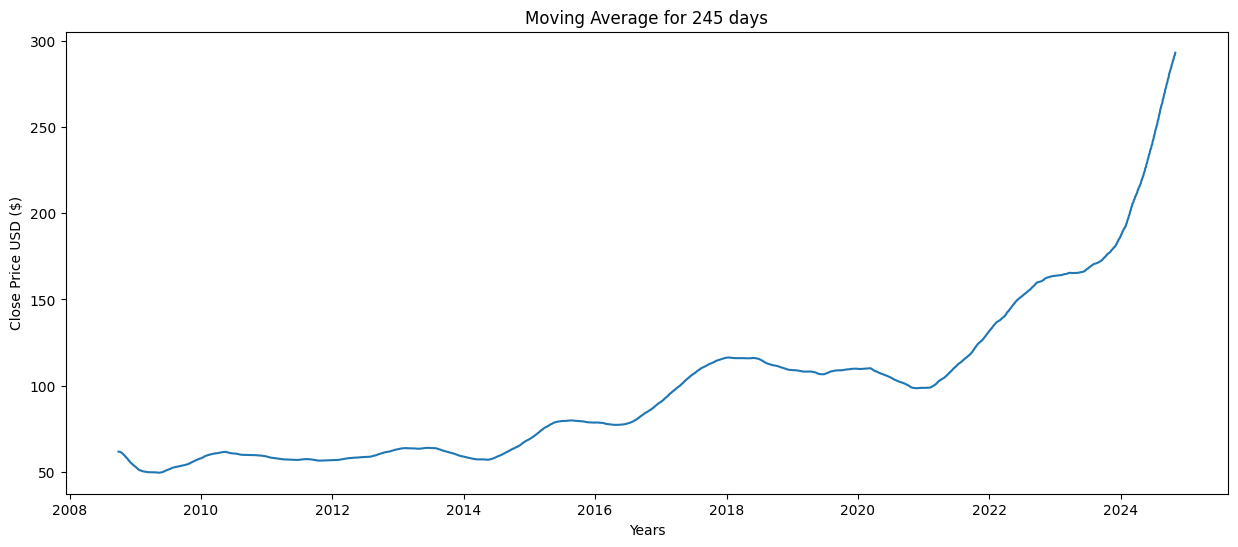

In [ ]:
plt.figure(figsize = (15,6))
df["Moving Average for 245 days"].plot()
plt.title('Moving Average for 245 days')
plt.xlabel('Years')
plt.ylabel('Close Price USD ($)')
plt.show()

<Figure size 1500x600 with 0 Axes>

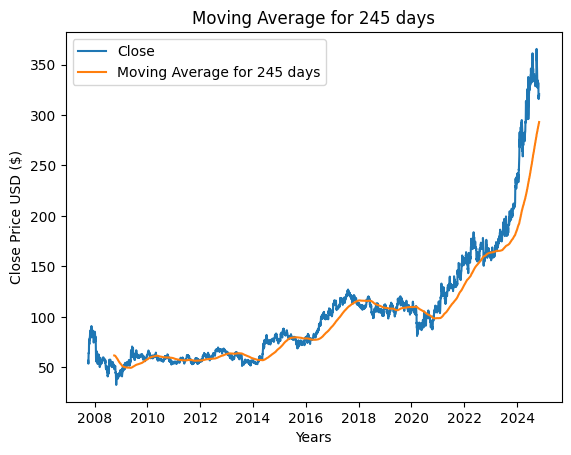

In [ ]:
plt.figure(figsize = (15,6))
df[["Close","Moving Average for 245 days"]].plot()
plt.title('Moving Average for 245 days')
plt.xlabel('Years')
plt.ylabel('Close Price USD ($)')
plt.show()

In [ ]:
#To find how much the percentage got change.
df["Percentage Change"] = df["Close"].pct_change()
df[["Close","Percentage Change"]].head()

,Close,Percentage Change
Date,,
2007-10-05,56.587513,NaN
2007-10-08,53.690639,-0.051193
2007-10-09,57.346889,0.068098
2007-10-10,57.881264,0.009318
2007-10-11,64.350014,0.111759


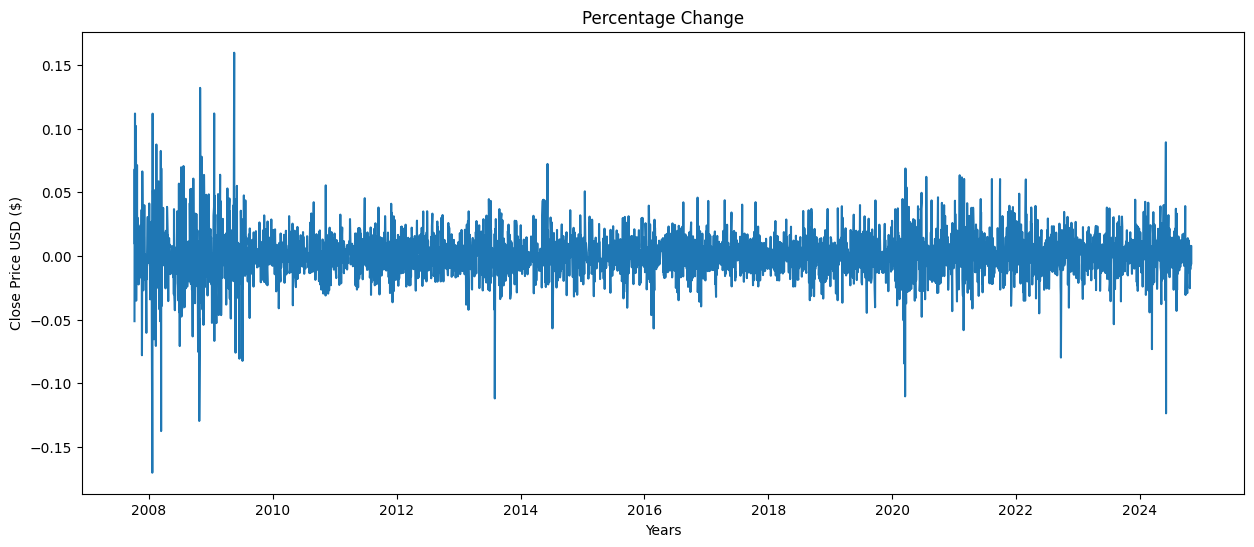

In [ ]:
plt.figure(figsize = (15,6))
df["Percentage Change"].plot()
plt.title('Percentage Change')
plt.xlabel('Years')
plt.ylabel('Close Price USD ($)')
plt.show()